#Imports

In [1]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.8 MB/s eta 0:00:00


In [2]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=520ca896b6f0190a986a3afcac21aa38d1560e67e87038120f1c379dc7f3cb3e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.0 MB/s eta 0:00:00


In [4]:
import math
import numpy
import pandas
from fractions import Fraction
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import pylatexenc

#RSA

In [5]:
def is_prime(n):
    if n == 1:
        return False

    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False

    return True

In [6]:
def rsa(p, q):
    if is_prime(p) == False or is_prime(q) == False:
        raise ValueError('Both numbers have to be prime.')

    n = p * q
    # if n < 26:
    #     raise ValueError('The product of p and q has to be greater than 26.')

    totient = (p - 1) * (q - 1)

    for e in range(2, totient):
        if numpy.gcd(e, totient) == 1:
            break

    d = 1
    while True:
        if d * e % totient == 1 and d != e and d != n:
            break
        d += 1

    return ((e, n), (d, n))

##Encryption and decryption

In [7]:
def encrypt(key, message):
    e, n = key
    encryption_map = {' ': '00', 'A': '01', 'B': '02', 'C': '03', 'D': '04', 'E': '05', 'F': '06', 'G': '07', 'H': '08',
                      'I': '09', 'J': '10', 'K': '11', 'L': '12', 'M': '13', 'N': '14', 'O': '15', 'P': '16', 'Q': '17',
                      'R': '18', 'S': '19', 'T': '20', 'U': '21', 'V': '22', 'W': '23', 'X': '24', 'Y': '25', 'Z': '26'}

    return ''.join([str(int(encryption_map[letter]) ** e % n).zfill(len(str(n))) for letter in message])

def decrypt(key, message):
    d, n = key
    decryption_map = {'00': ' ', '01': 'A', '02': 'B', '03': 'C', '04': 'D', '05': 'E', '06': 'F', '07': 'G', '08': 'H',
                      '09': 'I', '10': 'J', '11': 'K', '12': 'L', '13': 'M', '14': 'N', '15': 'O', '16': 'P', '17': 'Q',
                      '18': 'R', '19': 'S', '20': 'T', '21': 'U', '22': 'V', '23': 'W', '24': 'X', '25': 'Y', '26': 'Z'}

    message_blocks = [int(message[i : i + len(str(n))]) for i in range(0, len(message), len(str(n)))]
    return ''.join([decryption_map[str(number ** d % n).zfill(2)] for number in message_blocks])

In [8]:
public_key, private_key = rsa(13, 5)

encrypted_message = encrypt(public_key, 'QISKIT')
print(f'Encrypted message: {encrypted_message}')

decrypted_message = decrypt(private_key, encrypted_message)
print(f'Decrypted message: {decrypted_message}')

Encrypted message: 622954462950
Decrypted message: QISKIT


#Shor's Algorithm

##Quantum circuit

In [9]:
def a_x_mod15(a, x):
    U = QuantumCircuit(4)
    for iteration in range(x):
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
        for q in range(4):
            U.x(q)

    U = U.to_gate()
    U.name = f'{a}^{x} mod 15'
    c_U = U.control()
    return c_U

In [10]:
def iqft(n):
    qc = QuantumCircuit(n)

    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)

    for j in range(n):
        for m in range(j):
            qc.cp(-numpy.pi/float(2**(j-m)), m, j)
        qc.h(j)

    qc.name = 'IQFT'
    return qc

In [11]:
def create_circuit(n_count, a):
    qc = QuantumCircuit(n_count + 4, n_count)

    for q in range(n_count):
        qc.h(q)

    qc.x(3 + n_count)

    for q in range(n_count):
        qc.append(a_x_mod15(a, 2**q), [q] + [i + n_count for i in range(4)])

    qc.append(iqft(n_count), range(n_count))

    qc.measure(range(n_count), range(n_count))
    return qc

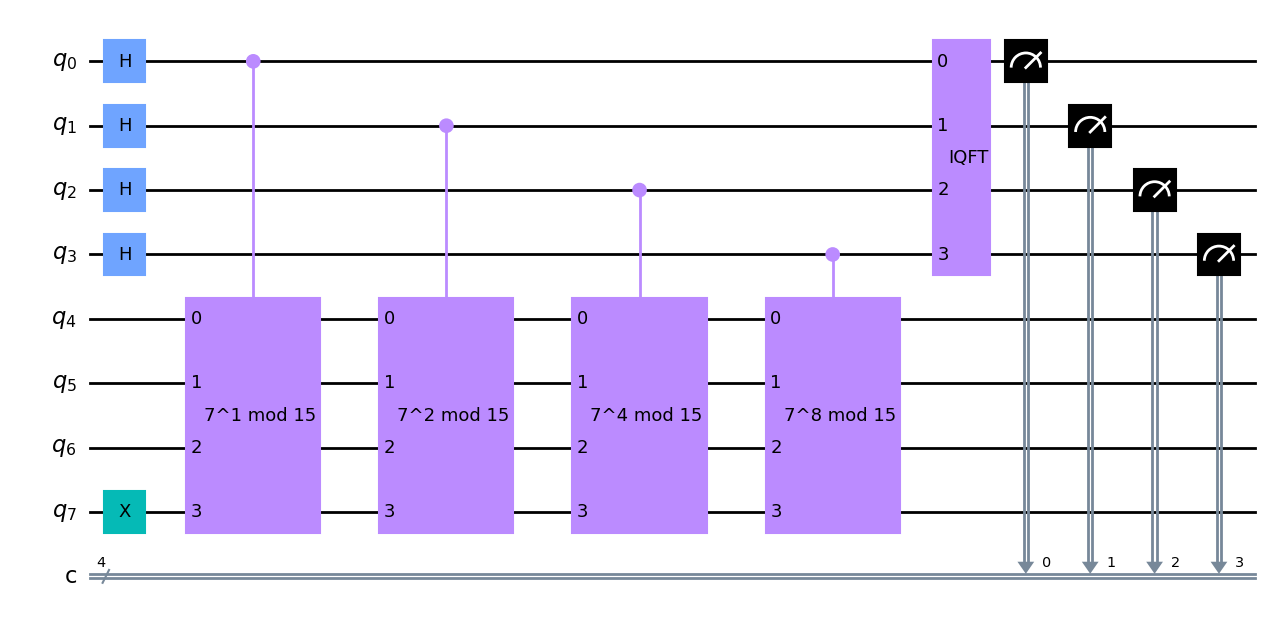

In [23]:
n_count = 4
a = 7
qc = create_circuit(n_count, a)
qc.draw('mpl', fold=50)

##Period finding

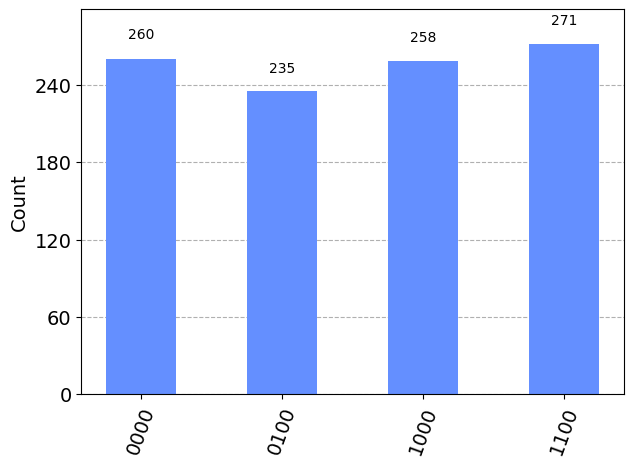

In [13]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend).result().get_counts()
plot_histogram(counts)

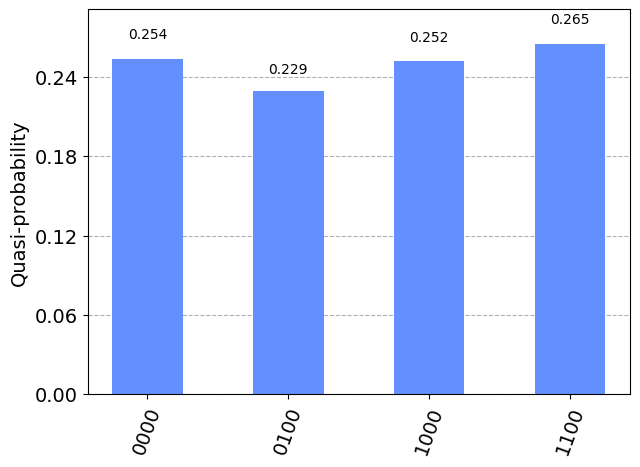

In [14]:
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}
plot_histogram(probabilities)

In [45]:
rows, measured_phases = [], []
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[0]))
for count in sorted_counts:
    decimal = int(count, 2)
    phase = decimal / (2**n_count)
    fraction = Fraction(phase)
    measured_phases.append(phase)
    rows.append([f'{count}(bin) = {decimal:>3}(dec)',
                 f'{decimal}/{2**n_count} = {phase:.2f}',
                 f'{fraction.numerator}/{fraction.denominator}',
                 fraction.denominator])

headers=['Register Output', 'Phase', 'Fraction', 'Guess for r']
df = pandas.DataFrame(rows, columns=headers)
df

,Register Output,Phase,Fraction,Guess for r
0,0000(bin) = 0(dec),0/16 = 0.00,0/1,1
1,0100(bin) = 4(dec),4/16 = 0.25,1/4,4
2,1000(bin) = 8(dec),8/16 = 0.50,1/2,2
3,1100(bin) = 12(dec),12/16 = 0.75,3/4,4


##Factoring 15

In [46]:
N = 15
factors = set()
periods = [row[-1] for row in rows]
for period in periods:
    guesses = [numpy.gcd(int((a**(period/2))) + 1, N), numpy.gcd(int((a**(period/2))) - 1, N)]
    for guess in guesses:
        if guess != 1 and guess != N and N % guess == 0:
            factors.add(guess)

if len(factors):
    p = factors.pop()
    q = factors.pop() if len(factors) else N // p
    print(f'p={p}, q={q}')
else:
    print("Shor's Algorithm failed. Choose different 'a'.")

p=3, q=5


#Example

In [63]:
def find_factors(N):
    a = numpy.random.randint(2, N)

    possible_factor = numpy.gcd(a, N)
    if possible_factor != 1:
        print(f'You have found a non-trivial factor of {N}.', end=' ')
        print(f'The factors are {possible_factor} and {int(N/possible_factor)}.')
        return (possible_factor, int(N/possible_factor))

    n = 4
    qc = create_circuit(n, a)
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend).result().get_counts()

    measured_phases = []
    for count in counts:
        measured_phases.append(int(count, 2) / (2**n_count))

    periods = set()
    for phase in measured_phases:
        period = Fraction(phase).denominator
        if period % 2 == 0:
            periods.add(period)

    factors = set()
    for period in periods:
        a_power_half = int(a**(period/2))
        guesses = [numpy.gcd(a_power_half + 1, N), numpy.gcd(a_power_half - 1, N)]
        for guess in guesses:
            if guess != 1 and guess != N and N % guess == 0:
                factors.add(guess)

    if len(factors):
        p = factors.pop()
        q = factors.pop() if len(factors) else N // p
        print(f'You have successfully factored {N} with a={a}. The factors are {p} and {q}.')
        return (p, q)
    else:
        print(f"Shor's Algorithm failed for a={a}. Choosing different 'a'.")
        return find_factors(N)

In [71]:
message = '144572240572348000540430283348'
public_key = (5, 851)

print('Results:')

p, q = find_factors(public_key[1])
public_key_shor, private_key_shor = rsa(p, q)

print(f'The private key is {private_key_shor}.')
print(f'The secret message is {decrypt(private_key_shor, message)}.')

Results:
Shor's Algorithm failed for a=658. Choosing different 'a'.
Shor's Algorithm failed for a=821. Choosing different 'a'.
Shor's Algorithm failed for a=846. Choosing different 'a'.
You have successfully factored 851 with a=574. The factors are 23 and 37.
The private key is (317, 851).
The secret message is PETER SHOR.
